In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import openpyxl
from datetime import datetime

In [ ]:
df['CONCISE_ADDRESS'] = df['CONCISE_ADDRESS'].apply(lambda x: ', '.join(x.split(', ')[:2]) if isinstance(x, str) else x)
df['CONCISE_ADDRESS'] = df['CONCISE_ADDRESS'].fillna('Not Provided')

In [ ]:
df['CONCISE_ADDRESS'] = df['CONCISE_ADDRESS'].apply(lambda x: ', '.join(x.split(', ')[:2]) if isinstance(x, str) else x)
df['CONCISE_ADDRESS'] = df['CONCISE_ADDRESS'].fillna('Not Provided')

In [ ]:
df['GRANT_CATEGORY'] = df['GRANT_CATEGORY'].fillna('payer')

In [ ]:
df['BIRTH_DATE'] = pd.to_datetime(df['BIRTH_DATE'])

today = datetime.today()

median_age = int(df['AGE'].median())

def fill_age(row):
    if pd.isna(row['AGE']) and pd.notna(row['BIRTH_DATE']):
        return today.year - row['BIRTH_DATE'].year - (
            (today.month, today.day) < (row['BIRTH_DATE'].month, row['BIRTH_DATE'].day)
        )
    elif pd.isna(row['AGE']):
        return median_age
    else:
        return int(row['AGE'])

df['AGE'] = df.apply(fill_age, axis=1)

median_birth_date = pd.to_datetime(df['BIRTH_DATE']).median()

def fill_birth_date(row):
    if pd.isna(row['BIRTH_DATE']) and pd.notna(row['AGE']):
        age_years = int(row['AGE'])
        estimated_date = datetime(today.year - age_years, today.month, today.day)
        if estimated_date > today:
            estimated_date = datetime(today.year - age_years - 1, today.month, today.day)
        return estimated_date
    elif pd.isna(row['BIRTH_DATE']):
        return median_birth_date
    else:
        return row['BIRTH_DATE']

df['BIRTH_DATE'] = df.apply(fill_birth_date, axis=1)


In [ ]:
def fill_nationality(row):
    if row['COUNTRY'] == 'Tajikistan' and pd.isna(row['NATIONALITY']):
        return 'Tajik'
    return row['NATIONALITY']


df['NATIONALITY'] = df.apply(fill_nationality, axis=1)

df['NATIONALITY'].fillna('Kazakh', inplace=True)

C:\Users\Омар\AppData\Local\Temp\ipykernel_10660\3896842074.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NATIONALITY'].fillna('Kazakh', inplace=True)


In [ ]:
def fill_country(row):
    if pd.isna(row['COUNTRY']):
        if row['NATIONALITY'] == 'Turk':
            return 'Turkey'
        elif row['NATIONALITY'] == 'Uzbek':
            return 'Kazakhstan'
        elif row['NATIONALITY'] == 'Kurd':
            return 'Kazakhstan'
        else:
            return 'Kazakhstan'
    return row['COUNTRY']


df['COUNTRY'] = df.apply(fill_country, axis=1)

In [ ]:
df['JOIN_MARKS'] = df['JOIN_MARKS'].fillna(0)

In [ ]:
df['FAILED_COURSES'] = df['FAILED_COURSES'].fillna('Not Failed:)')

In [ ]:
df

,№,CLASS,PROG_CODE,EDU_LANG,SPECIALITY,DEP_CODE,DEP_CODE_F,EDU_LEVEL,STATUS,JOIN_MARKS,...,AGE,COUNTRY,NATIONALITY,CONCISE_ADDRESS,GRANT_CATEGORY,SCHOOL_TYPE,ATTESTAT_GPA,GPA,FAILED_COURSES,REPEATSYEAR
0,1,3,10107,EN,Компьютерлік ғылымдар,DEP_COMP_SCI,F_ENG,B,Not studying,0.0,...,22,Kazakhstan,Kazakh,Not Provided,SG,School,NaN,1.80,"CSS 102,CSS 104,CSS 198,CSS 202,CSS 204,CSS 20...",0
1,2,1,10107,EN,Компьютерлік ғылымдар,DEP_COMP_SCI,F_ENG,B,Not studying,67.0,...,27,Kazakhstan,Kazakh,Not Provided,payer,School,NaN,0.17,"CSS 101,HSS 111,INF 101,MAT 151,MAT 153,TFL 16...",0
2,3,2,10107,EN,Компьютерлік ғылымдар,DEP_COMP_SCI,F_ENG,B,Not studying,0.0,...,22,Kazakhstan,Kazakh,Not Provided,payer,School,NaN,1.24,"CSS 102,CSS 106,CSS 152,CSS 201,CSS 223,CSS 25...",0
3,4,1,10107,EN,Компьютерлік ғылымдар,DEP_COMP_SCI,F_ENG,B,Not studying,91.0,...,27,Kazakhstan,Uzbek,Not Provided,SG,Lycee (KTL),NaN,3.44,Not Failed:),0
4,5,3,10103,EN,Ақпараттық жүйелер,DEP_INF_SYS,F_ENG,B,Not studying,93.0,...,31,Kazakhstan,Kazakh,Not Provided,payer,Lycee (KTL),NaN,1.48,"CSS 216,CSS 248,CSS 303,CSS 304,HSS 172,INF 20...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7842,7843,4,10107,EN,Компьютерлік ғылымдар,DEP_COMP_SCI,F_ENG,B,Graduated,0.0,...,22,Kazakhstan,Kazakh,Not Provided,payer,School,NaN,1.81,Not Failed:),0
7843,7844,4,10103,EN,Ақпараттық жүйелер,DEP_INF_SYS,F_ENG,B,Graduated,61.0,...,31,Kazakhstan,Kazakh,Not Provided,UG,School,NaN,2.63,Not Failed:),0
7844,7845,2,10106,KZ,Ақпараттық жүйелер,DEP_INF_SYS,F_ENG,B,Not studying,60.0,...,27,Kazakhstan,Kazakh,Not Provided,payer,School,NaN,1.62,"MAT 252,TFL 161,TFL 164",0
7845,7846,4,10103,EN,Ақпараттық жүйелер,DEP_INF_SYS,F_ENG,B,Graduated,97.0,...,31,Kazakhstan,Kazakh,Not Provided,SG,School,NaN,2.98,Not Failed:),0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7847 entries, 0 to 7846
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   №                7847 non-null   int64         
 1   CLASS            7847 non-null   int64         
 2   PROG_CODE        7847 non-null   int64         
 3   EDU_LANG         7847 non-null   object        
 4   SPECIALITY       7847 non-null   object        
 5   DEP_CODE         7847 non-null   object        
 6   DEP_CODE_F       7847 non-null   object        
 7   EDU_LEVEL        7847 non-null   object        
 8   STATUS           7847 non-null   object        
 9   JOIN_MARKS       7847 non-null   float64       
 10  GENDER           7847 non-null   object        
 11  BIRTH_DATE       7847 non-null   datetime64[ns]
 12  AGE              7847 non-null   int64         
 13  COUNTRY          7847 non-null   object        
 14  NATIONALITY      7847 non-null   object 

In [ ]:
df.isnull().sum()

№                     0
CLASS                 0
PROG_CODE             0
EDU_LANG              0
SPECIALITY            0
DEP_CODE              0
DEP_CODE_F            0
EDU_LEVEL             0
STATUS                0
JOIN_MARKS            0
GENDER                0
BIRTH_DATE            0
AGE                   0
COUNTRY               0
NATIONALITY           0
CONCISE_ADDRESS       0
GRANT_CATEGORY        0
SCHOOL_TYPE           0
ATTESTAT_GPA       3693
GPA                 562
FAILED_COURSES        0
REPEATSYEAR           0
dtype: int64

In [8]:
df['BIRTH_DATE'] = pd.to_datetime(df['BIRTH_DATE'], errors='coerce')

df['BIRTH_DATE'] = df['BIRTH_DATE'] + pd.Timedelta(hours=1)

df['BIRTH_DATE'] = df['BIRTH_DATE'].dt.strftime('%Y-%m-%d %H:%M:%S')

print(df)

      Unnamed: 0     №  CLASS  PROG_CODE EDU_LANG             SPECIALITY  \
0              0     1      3      10107       EN  Компьютерлік ғылымдар   
1              1     2      1      10107       EN  Компьютерлік ғылымдар   
2              2     3      2      10107       EN  Компьютерлік ғылымдар   
3              3     4      1      10107       EN  Компьютерлік ғылымдар   
4              4     5      3      10103       EN     Ақпараттық жүйелер   
...          ...   ...    ...        ...      ...                    ...   
7842        7842  7843      4      10107       EN  Компьютерлік ғылымдар   
7843        7843  7844      4      10103       EN     Ақпараттық жүйелер   
7844        7844  7845      2      10106       KZ     Ақпараттық жүйелер   
7845        7845  7846      4      10103       EN     Ақпараттық жүйелер   
7846        7846  7847      4      10107       EN  Компьютерлік ғылымдар   

          DEP_CODE DEP_CODE_F EDU_LEVEL        STATUS  ...  AGE     COUNTRY  \
0     DE

In [10]:
def convert_gpa(gpa):
  if pd.isna(gpa):
        return 0
  if gpa > 5 and gpa <= 100:
      return (gpa * 5) / 100
  elif gpa > 100 :
      return 0
  else:
      return gpa
df['ATTESTAT_GPA'] = df['ATTESTAT_GPA'].apply(convert_gpa)
df

,Unnamed: 0,№,CLASS,PROG_CODE,EDU_LANG,SPECIALITY,DEP_CODE,DEP_CODE_F,EDU_LEVEL,STATUS,...,AGE,COUNTRY,NATIONALITY,CONCISE_ADDRESS,GRANT_CATEGORY,SCHOOL_TYPE,ATTESTAT_GPA,GPA,FAILED_COURSES,REPEATSYEAR
0,0,1,3,10107,EN,Компьютерлік ғылымдар,DEP_COMP_SCI,F_ENG,B,Not studying,...,22,Kazakhstan,Kazakh,Not Provided,SG,School,0.0,1.80,"CSS 102,CSS 104,CSS 198,CSS 202,CSS 204,CSS 20...",0
1,1,2,1,10107,EN,Компьютерлік ғылымдар,DEP_COMP_SCI,F_ENG,B,Not studying,...,27,Kazakhstan,Kazakh,Not Provided,payer,School,0.0,0.17,"CSS 101,HSS 111,INF 101,MAT 151,MAT 153,TFL 16...",0
2,2,3,2,10107,EN,Компьютерлік ғылымдар,DEP_COMP_SCI,F_ENG,B,Not studying,...,22,Kazakhstan,Kazakh,Not Provided,payer,School,0.0,1.24,"CSS 102,CSS 106,CSS 152,CSS 201,CSS 223,CSS 25...",0
3,3,4,1,10107,EN,Компьютерлік ғылымдар,DEP_COMP_SCI,F_ENG,B,Not studying,...,27,Kazakhstan,Uzbek,Not Provided,SG,Lycee (KTL),0.0,3.44,Not Failed:),0
4,4,5,3,10103,EN,Ақпараттық жүйелер,DEP_INF_SYS,F_ENG,B,Not studying,...,31,Kazakhstan,Kazakh,Not Provided,payer,Lycee (KTL),0.0,1.48,"CSS 216,CSS 248,CSS 303,CSS 304,HSS 172,INF 20...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7842,7842,7843,4,10107,EN,Компьютерлік ғылымдар,DEP_COMP_SCI,F_ENG,B,Graduated,...,22,Kazakhstan,Kazakh,Not Provided,payer,School,0.0,1.81,Not Failed:),0
7843,7843,7844,4,10103,EN,Ақпараттық жүйелер,DEP_INF_SYS,F_ENG,B,Graduated,...,31,Kazakhstan,Kazakh,Not Provided,UG,School,0.0,2.63,Not Failed:),0
7844,7844,7845,2,10106,KZ,Ақпараттық жүйелер,DEP_INF_SYS,F_ENG,B,Not studying,...,27,Kazakhstan,Kazakh,Not Provided,payer,School,0.0,1.62,"MAT 252,TFL 161,TFL 164",0
7845,7845,7846,4,10103,EN,Ақпараттық жүйелер,DEP_INF_SYS,F_ENG,B,Graduated,...,31,Kazakhstan,Kazakh,Not Provided,SG,School,0.0,2.98,Not Failed:),0


In [11]:
df.isnull().sum()

,0
Unnamed: 0,0
№,0
CLASS,0
PROG_CODE,0
EDU_LANG,0
SPECIALITY,0
DEP_CODE,0
DEP_CODE_F,0
EDU_LEVEL,0
STATUS,0


In [35]:
df


,Unnamed: 0.1,Unnamed: 0,№,CLASS,PROG_CODE,EDU_LANG,SPECIALITY,DEP_CODE,DEP_CODE_F,EDU_LEVEL,...,NATIONALITY,CONCISE_ADDRESS,GRANT_CATEGORY,SCHOOL_TYPE,ATTESTAT_GPA,GPA,FAILED_COURSES,REPEATSYEAR,REG_DATE,FAILED_COURSES_COUNT
1482,1482,1482,1483,1,10113,EN,Ақпараттық жүйелер,DEP_INF_SYS,F_ENG,B,...,Kazakh,"Қазақстан, Алматы облысы(05)",payer,College,4.35,0.37,"CEC 102,CSS 105,INF 202,MAT 153,MDE 131",0,2020-08-18 00:00:52,5
1484,1484,1484,1485,4,10103,EN,Ақпараттық жүйелер,DEP_INF_SYS,F_ENG,B,...,Kazakh,"Қазақстан, Шымкент қаласы",SG,Lycee (KTL),4.94,1.58,"MAT 251,MDE 162,MAT 154,CSS 411,CSS 437,INF 26...",1,2020-07-14 00:00:52,14
1485,1485,1485,1486,4,10103,EN,Ақпараттық жүйелер,DEP_INF_SYS,F_ENG,B,...,Kazakh,"Қазақстан, Алматы облысы(05)",SG,NIS,4.47,2.77,"INF 313,INF 429",1,2020-07-22 00:00:52,2
1486,1486,1486,1487,4,10103,EN,Ақпараттық жүйелер,DEP_INF_SYS,F_ENG,B,...,Kazakh,"Қазақстан, Жамбыл облысы(08)",SG,Other,4.70,0.83,"CSS 214,CSS 380,MAT 251,MDE 151,MDE 161,MDE 11...",1,2020-08-21 00:00:52,29
1487,1487,1487,1488,4,10103,EN,Ақпараттық жүйелер,DEP_INF_SYS,F_ENG,B,...,Kazakh,"Қазақстан, Түркістан облысы(13)",SG,School,0.00,1.75,"CSS 214,INF 427,MAT 251,CSS 152,INF 313,INF 20...",1,2020-08-25 00:00:52,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7067,7067,7067,7068,4,10103,EN,Ақпараттық жүйелер,DEP_INF_SYS,F_ENG,B,...,Kazakh,"Қазақстан, Ақтөбе облысы(04)",SG,NIS,0.00,2.11,"MAT 154,CSS 152,CSS 439,INF 323,MAT 251,CSS 10...",1,2020-06-09 00:00:52,7
7069,7069,7069,7070,1,10103,EN,Ақпараттық жүйелер,DEP_INF_SYS,F_ENG,B,...,Kazakh,"Қазақстан, Шығыс Қазақстан облысы",payer,Other,4.00,0.00,"INF 328,INF 317,INF 304,CSS 105",0,2024-09-03 00:00:52,4
7076,7076,7076,7077,4,10107,EN,Компьютерлік ғылымдар,DEP_COMP_SCI,F_ENG,B,...,Uyghur,"Қазақстан, Алматы қаласы",SG,Gimnaziya,4.32,1.06,"CSS 215,MDE 133,INF 106,CSS 214,CSS 341,CSS 25...",0,2020-06-09 00:00:52,16
7077,7077,7077,7078,3,10103,EN,Ақпараттық жүйелер,DEP_INF_SYS,F_ENG,B,...,Kazakh,"Қазақстан, Шымкент қ.",payer,School,4.79,0.76,"CSS 108,MAT 151,INF 201,INF 202,MAT 154,MAT 25...",0,2022-08-16 00:00:52,16


In [13]:
df.columns

Index(['Unnamed: 0', '№', 'CLASS', 'PROG_CODE', 'EDU_LANG', 'SPECIALITY',
       'DEP_CODE', 'DEP_CODE_F', 'EDU_LEVEL', 'STATUS', 'JOIN_MARKS', 'GENDER',
       'BIRTH_DATE', 'AGE', 'COUNTRY', 'NATIONALITY', 'CONCISE_ADDRESS',
       'GRANT_CATEGORY', 'SCHOOL_TYPE', 'ATTESTAT_GPA', 'GPA',
       'FAILED_COURSES', 'REPEATSYEAR'],
      dtype='object')

In [14]:
df['GPA'] = df['GPA'].fillna(0)


In [15]:
df.isnull().sum()

,0
Unnamed: 0,0
№,0
CLASS,0
PROG_CODE,0
EDU_LANG,0
SPECIALITY,0
DEP_CODE,0
DEP_CODE_F,0
EDU_LEVEL,0
STATUS,0


In [4]:
df = pd.read_excel("The_Final_Dataset.xlsx")

In [5]:
df['BIRTH_DATE'] = pd.to_datetime(df['BIRTH_DATE'], errors='coerce')

df['BIRTH_DATE'] = df['BIRTH_DATE'] + pd.Timedelta(hours=1)

df['BIRTH_DATE'] = df['BIRTH_DATE'].dt.strftime('%Y-%m-%d %H:%M:%S')

print(df)

      Unnamed: 0.1  Unnamed: 0     №  CLASS  PROG_CODE EDU_LANG  \
0                0           0     1      3      10107       EN   
1                1           1     2      1      10107       EN   
2                2           2     3      2      10107       EN   
3                3           3     4      1      10107       EN   
4                4           4     5      3      10103       EN   
...            ...         ...   ...    ...        ...      ...   
7842          7842        7842  7843      4      10107       EN   
7843          7843        7843  7844      4      10103       EN   
7844          7844        7844  7845      2      10106       KZ   
7845          7845        7845  7846      4      10103       EN   
7846          7846        7846  7847      4      10107       EN   

                 SPECIALITY      DEP_CODE DEP_CODE_F EDU_LEVEL  ...  \
0     Компьютерлік ғылымдар  DEP_COMP_SCI      F_ENG         B  ...   
1     Компьютерлік ғылымдар  DEP_COMP_SCI      F_ENG 

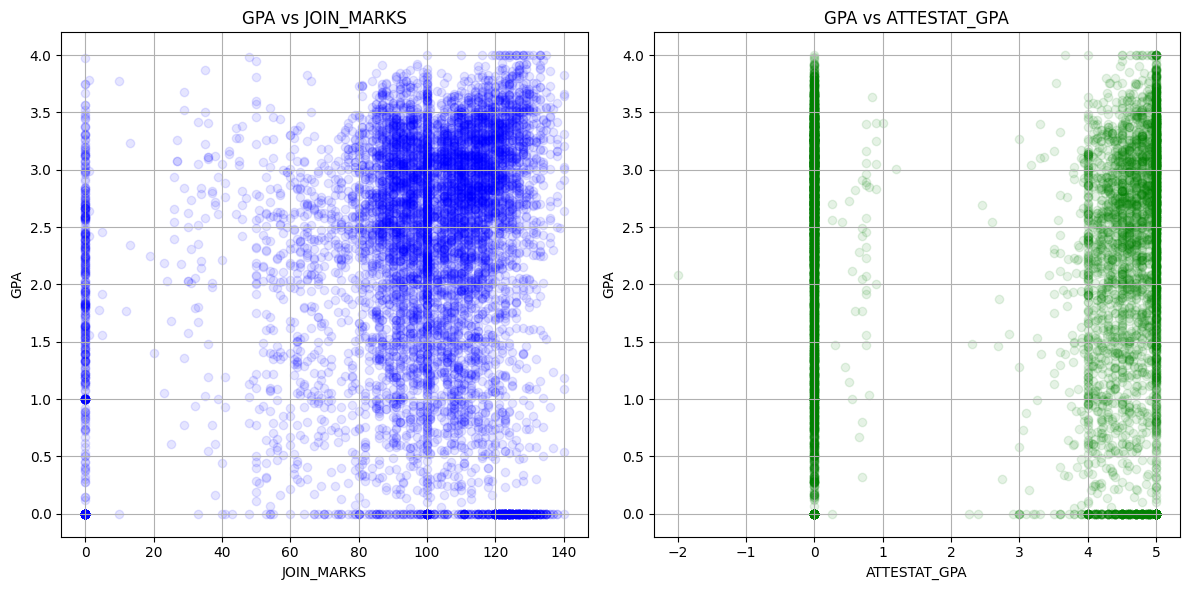

In [15]:
plt.figure(figsize=(12, 6))

# GPA vs JOIN_MARKS
plt.subplot(1, 2, 1)
plt.scatter(df['JOIN_MARKS'], df['GPA'], color='blue', alpha=0.1)
plt.title('GPA vs JOIN_MARKS')
plt.xlabel('JOIN_MARKS')
plt.ylabel('GPA')
plt.grid(True)

# GPA vs ATTESTAT_GPA
plt.subplot(1, 2, 2)
plt.scatter(df['ATTESTAT_GPA'], df['GPA'], color='green', alpha=0.1)
plt.title('GPA vs ATTESTAT_GPA')
plt.xlabel('ATTESTAT_GPA')
plt.ylabel('GPA')
plt.grid(True)

plt.tight_layout()
plt.show()

In [16]:

# Remove brackets and their content from CONCISE_ADDRESS
df['CONCISE_ADDRESS'] = df['CONCISE_ADDRESS'].str.replace(r"\s*\(.*?\)", "", regex=True)

In [18]:
df[df['CONCISE_ADDRESS'].notnull()]

,Unnamed: 0.1,Unnamed: 0,№,CLASS,PROG_CODE,EDU_LANG,SPECIALITY,DEP_CODE,DEP_CODE_F,EDU_LEVEL,...,COUNTRY,NATIONALITY,CONCISE_ADDRESS,GRANT_CATEGORY,SCHOOL_TYPE,ATTESTAT_GPA,GPA,FAILED_COURSES,REPEATSYEAR,REG_DATE
0,0,0,1,3,10107,EN,Компьютерлік ғылымдар,DEP_COMP_SCI,F_ENG,B,...,Kazakhstan,Kazakh,Not Provided,SG,School,0.0,1.80,"CSS 102,CSS 104,CSS 198,CSS 202,CSS 204,CSS 20...",0,NaT
1,1,1,2,1,10107,EN,Компьютерлік ғылымдар,DEP_COMP_SCI,F_ENG,B,...,Kazakhstan,Kazakh,Not Provided,payer,School,0.0,0.17,"CSS 101,HSS 111,INF 101,MAT 151,MAT 153,TFL 16...",0,NaT
2,2,2,3,2,10107,EN,Компьютерлік ғылымдар,DEP_COMP_SCI,F_ENG,B,...,Kazakhstan,Kazakh,Not Provided,payer,School,0.0,1.24,"CSS 102,CSS 106,CSS 152,CSS 201,CSS 223,CSS 25...",0,NaT
3,3,3,4,1,10107,EN,Компьютерлік ғылымдар,DEP_COMP_SCI,F_ENG,B,...,Kazakhstan,Uzbek,Not Provided,SG,Lycee (KTL),0.0,3.44,Not Failed:),0,NaT
4,4,4,5,3,10103,EN,Ақпараттық жүйелер,DEP_INF_SYS,F_ENG,B,...,Kazakhstan,Kazakh,Not Provided,payer,Lycee (KTL),0.0,1.48,"CSS 216,CSS 248,CSS 303,CSS 304,HSS 172,INF 20...",0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7842,7842,7842,7843,4,10107,EN,Компьютерлік ғылымдар,DEP_COMP_SCI,F_ENG,B,...,Kazakhstan,Kazakh,Not Provided,payer,School,0.0,1.81,Not Failed:),0,NaT
7843,7843,7843,7844,4,10103,EN,Ақпараттық жүйелер,DEP_INF_SYS,F_ENG,B,...,Kazakhstan,Kazakh,Not Provided,UG,School,0.0,2.63,Not Failed:),0,NaT
7844,7844,7844,7845,2,10106,KZ,Ақпараттық жүйелер,DEP_INF_SYS,F_ENG,B,...,Kazakhstan,Kazakh,Not Provided,payer,School,0.0,1.62,"MAT 252,TFL 161,TFL 164",0,NaT
7845,7845,7845,7846,4,10103,EN,Ақпараттық жүйелер,DEP_INF_SYS,F_ENG,B,...,Kazakhstan,Kazakh,Not Provided,SG,School,0.0,2.98,Not Failed:),0,NaT


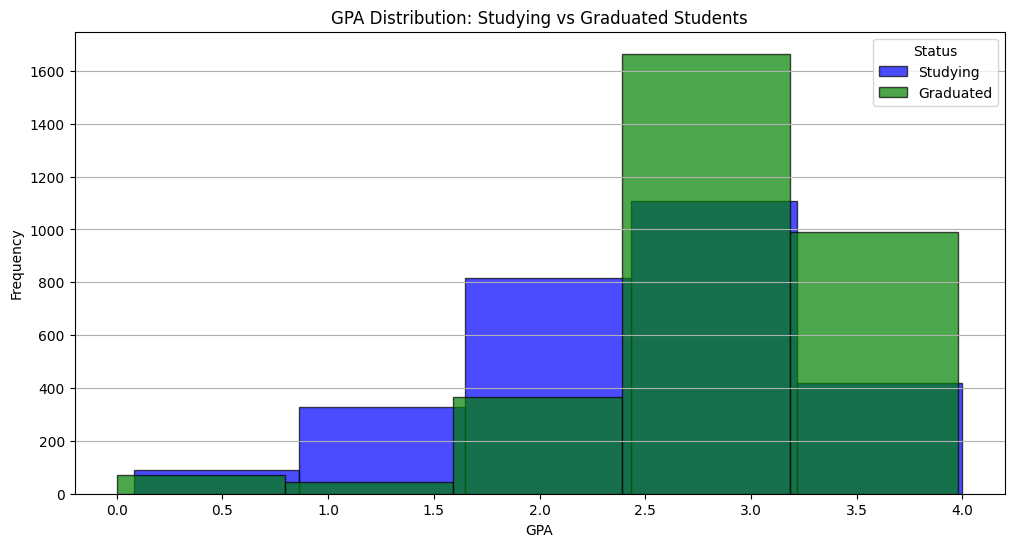

In [26]:
studying_df = df[(df['CLASS'].isin([2, 3, 4])) & (df['STATUS'] == 'Studying')]

# Filter data for STATUS 'Graduated'
graduated_df = df[df['STATUS'] == 'Graduated']

# Plot GPA distribution for studying and graduated students
plt.figure(figsize=(12, 6))

# Plot for studying students
plt.hist(studying_df['GPA'], bins=5, alpha=0.7, label='Studying', color='blue', edgecolor='black')

# Plot for graduated students
plt.hist(graduated_df['GPA'], bins=5, alpha=0.7, label='Graduated', color='green', edgecolor='black')

plt.title('GPA Distribution: Studying vs Graduated Students')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.grid(axis='y')
plt.show()

In [20]:
studying_df = df[(df['CLASS'].isin([2, 3, 4])) & (df['STATUS'] == 'Studying')]

# Filter data for STATUS 'Graduated'
graduated_df = df[df['STATUS'] == 'Graduated']

# Count the number of graduates and studying students
count_graduates = len(graduated_df)
count_studying = len(studying_df)

print(f"Number of Graduates: {count_graduates}")
print(f"Number of Studying Students: {count_studying}")

Number of Graduates: 3138
Number of Studying Students: 2762


In [5]:

unique_specialities = df['SPECIALITY'].unique()
print(f"Unique Specialities: {unique_specialities}")

Unique Specialities: ['Компьютерлік ғылымдар' 'Ақпараттық жүйелер'
 'Есептеу техникасы және бағдарламалық қамтамасыз ету' 'Математика'
 'Математикалық және компьютерлік модельдеу'
 'Статистика және деректер ғылымы' 'Мультимедиялық ғылымдар'
 'Бағдарламалық қамтамасыз ету']


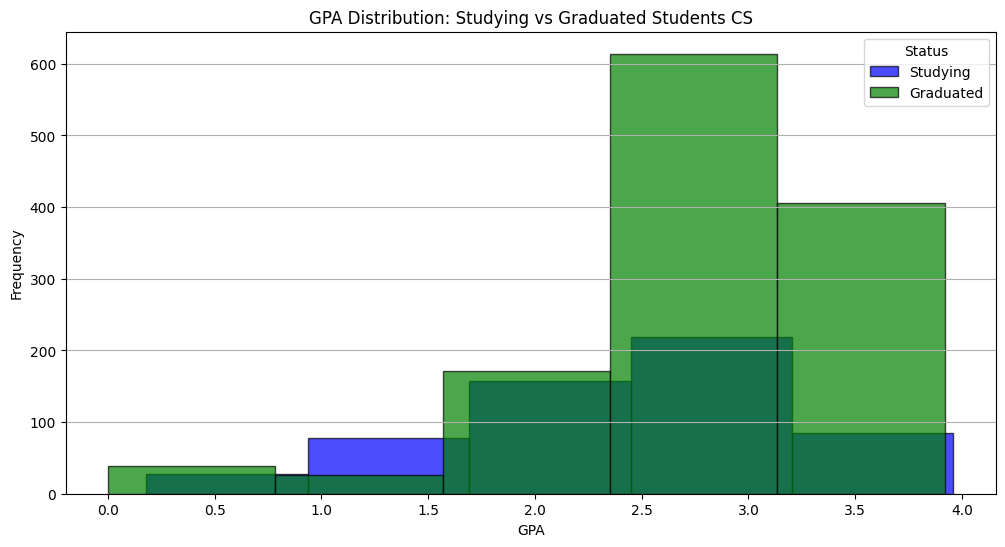

In [7]:
studying_df = df[(df['CLASS'].isin([2, 3, 4])) & (df['STATUS'] == 'Studying') & (df['SPECIALITY']=='Компьютерлік ғылымдар')]

# Filter data for STATUS 'Graduated'
graduated_df = df[(df['STATUS'] == 'Graduated')& (df['SPECIALITY']=='Компьютерлік ғылымдар')]

# Plot GPA distribution for studying and graduated students
plt.figure(figsize=(12, 6))

# Plot for studying students
plt.hist(studying_df['GPA'], bins=5, alpha=0.7, label='Studying', color='blue', edgecolor='black')

# Plot for graduated students
plt.hist(graduated_df['GPA'], bins=5, alpha=0.7, label='Graduated', color='green', edgecolor='black')

plt.title('GPA Distribution: Studying vs Graduated Students CS')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.grid(axis='y')
plt.show()

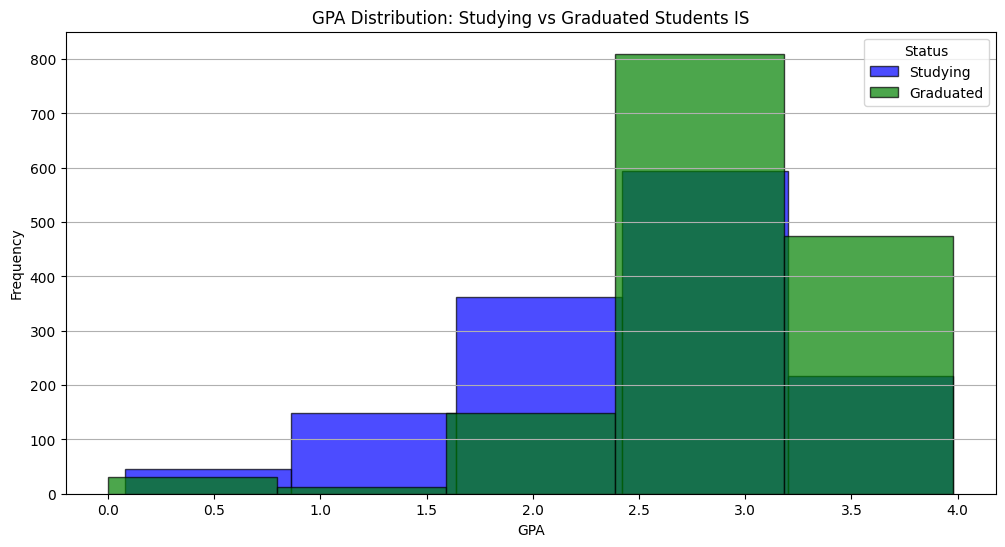

In [8]:
studying_df = df[(df['CLASS'].isin([2, 3, 4])) & (df['STATUS'] == 'Studying') & (df['SPECIALITY']=='Ақпараттық жүйелер')]

# Filter data for STATUS 'Graduated'
graduated_df = df[(df['STATUS'] == 'Graduated')& (df['SPECIALITY']=='Ақпараттық жүйелер')]

# Plot GPA distribution for studying and graduated students
plt.figure(figsize=(12, 6))

# Plot for studying students
plt.hist(studying_df['GPA'], bins=5, alpha=0.7, label='Studying', color='blue', edgecolor='black')

# Plot for graduated students
plt.hist(graduated_df['GPA'], bins=5, alpha=0.7, label='Graduated', color='green', edgecolor='black')

plt.title('GPA Distribution: Studying vs Graduated Students IS')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.grid(axis='y')
plt.show()

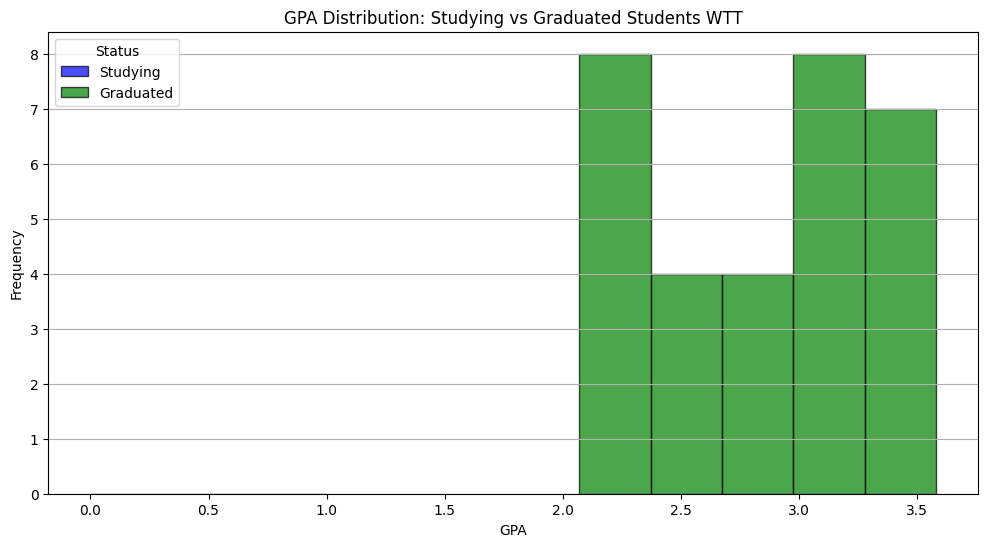

In [9]:
studying_df = df[(df['CLASS'].isin([2, 3, 4])) & (df['STATUS'] == 'Studying') & (df['SPECIALITY']=='Есептеу техникасы және бағдарламалық қамтамасыз ету')]

# Filter data for STATUS 'Graduated'
graduated_df = df[(df['STATUS'] == 'Graduated')& (df['SPECIALITY']=='Есептеу техникасы және бағдарламалық қамтамасыз ету')]

# Plot GPA distribution for studying and graduated students
plt.figure(figsize=(12, 6))

# Plot for studying students
plt.hist(studying_df['GPA'], bins=5, alpha=0.7, label='Studying', color='blue', edgecolor='black')

# Plot for graduated students
plt.hist(graduated_df['GPA'], bins=5, alpha=0.7, label='Graduated', color='green', edgecolor='black')

plt.title('GPA Distribution: Studying vs Graduated Students WTT')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.grid(axis='y')
plt.show()

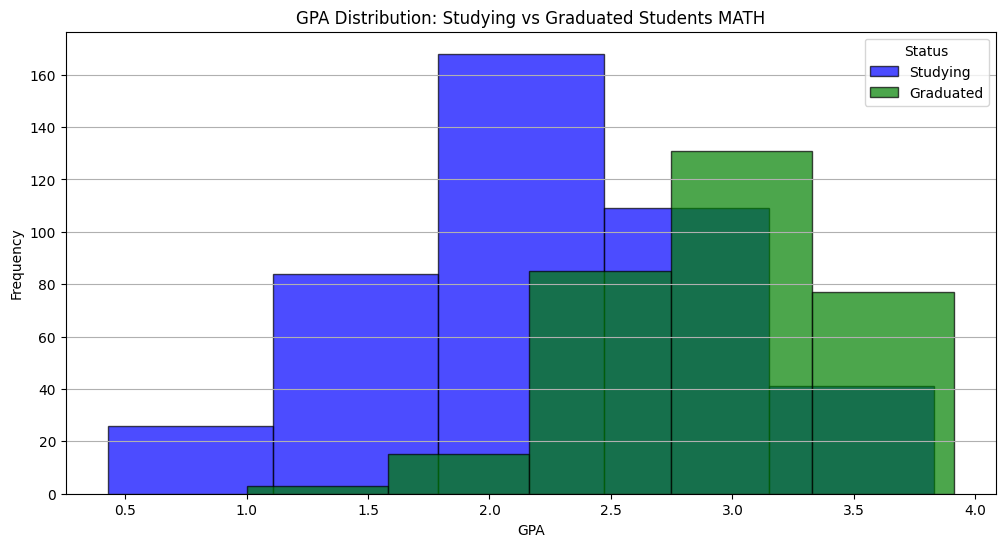

In [10]:
studying_df = df[(df['CLASS'].isin([2, 3, 4])) & (df['STATUS'] == 'Studying') & (df['SPECIALITY']=='Математика')]

# Filter data for STATUS 'Graduated'
graduated_df = df[(df['STATUS'] == 'Graduated')& (df['SPECIALITY']=='Математика')]

# Plot GPA distribution for studying and graduated students
plt.figure(figsize=(12, 6))

# Plot for studying students
plt.hist(studying_df['GPA'], bins=5, alpha=0.7, label='Studying', color='blue', edgecolor='black')

# Plot for graduated students
plt.hist(graduated_df['GPA'], bins=5, alpha=0.7, label='Graduated', color='green', edgecolor='black')

plt.title('GPA Distribution: Studying vs Graduated Students MATH')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.grid(axis='y')
plt.show()

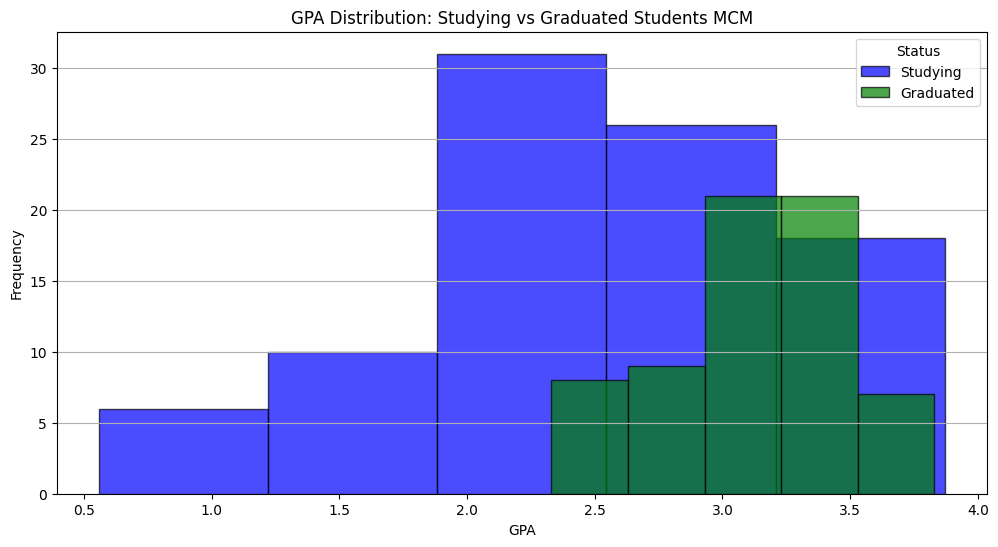

In [12]:
studying_df = df[(df['CLASS'].isin([2, 3, 4])) & (df['STATUS'] == 'Studying') & (df['SPECIALITY']=='Математикалық және компьютерлік модельдеу')]

# Filter data for STATUS 'Graduated'
graduated_df = df[(df['STATUS'] == 'Graduated')& (df['SPECIALITY']=='Математикалық және компьютерлік модельдеу')]

# Plot GPA distribution for studying and graduated students
plt.figure(figsize=(12, 6))

# Plot for studying students
plt.hist(studying_df['GPA'], bins=5, alpha=0.7, label='Studying', color='blue', edgecolor='black')

# Plot for graduated students
plt.hist(graduated_df['GPA'], bins=5, alpha=0.7, label='Graduated', color='green', edgecolor='black')

plt.title('GPA Distribution: Studying vs Graduated Students MCM')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.grid(axis='y')
plt.show()

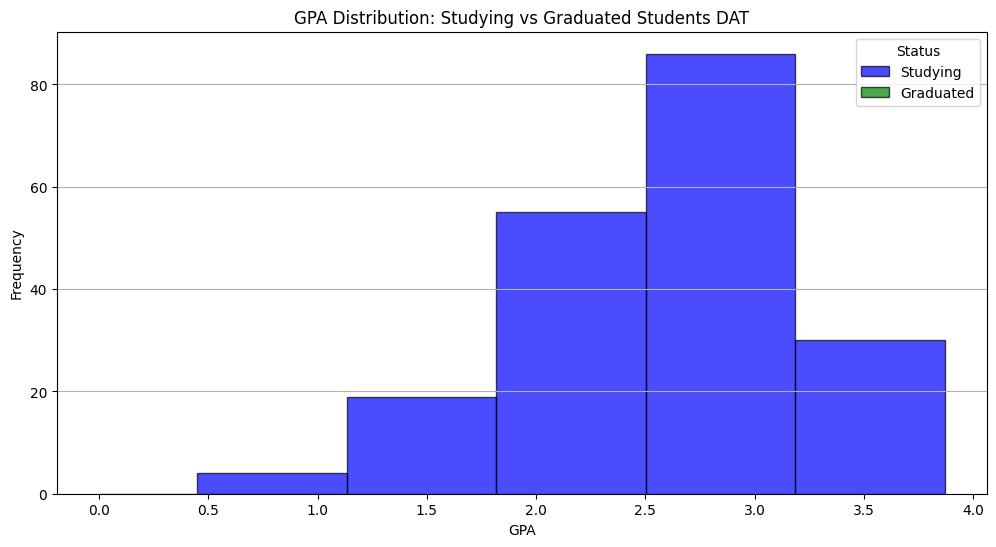

In [13]:
studying_df = df[(df['CLASS'].isin([2, 3, 4])) & (df['STATUS'] == 'Studying') & (df['SPECIALITY']=='Статистика және деректер ғылымы')]

# Filter data for STATUS 'Graduated'
graduated_df = df[(df['STATUS'] == 'Graduated')& (df['SPECIALITY']=='Статистика және деректер ғылымы')]

# Plot GPA distribution for studying and graduated students
plt.figure(figsize=(12, 6))

# Plot for studying students
plt.hist(studying_df['GPA'], bins=5, alpha=0.7, label='Studying', color='blue', edgecolor='black')

# Plot for graduated students
plt.hist(graduated_df['GPA'], bins=5, alpha=0.7, label='Graduated', color='green', edgecolor='black')

plt.title('GPA Distribution: Studying vs Graduated Students DAT')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.grid(axis='y')
plt.show()

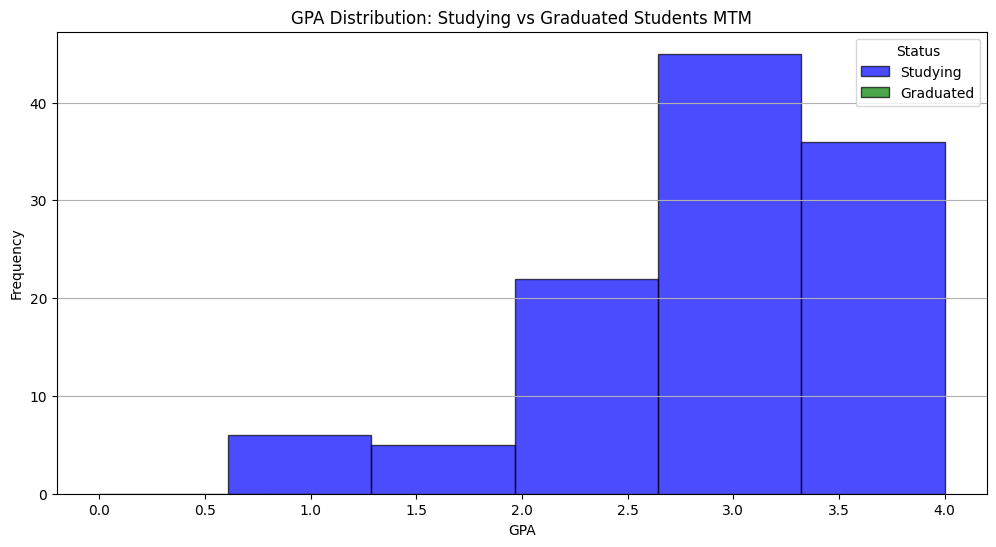

In [14]:
studying_df = df[(df['CLASS'].isin([2, 3, 4])) & (df['STATUS'] == 'Studying') & (df['SPECIALITY']=='Мультимедиялық ғылымдар')]

# Filter data for STATUS 'Graduated'
graduated_df = df[(df['STATUS'] == 'Graduated')& (df['SPECIALITY']=='Мультимедиялық ғылымдар')]

# Plot GPA distribution for studying and graduated students
plt.figure(figsize=(12, 6))

# Plot for studying students
plt.hist(studying_df['GPA'], bins=5, alpha=0.7, label='Studying', color='blue', edgecolor='black')

# Plot for graduated students
plt.hist(graduated_df['GPA'], bins=5, alpha=0.7, label='Graduated', color='green', edgecolor='black')

plt.title('GPA Distribution: Studying vs Graduated Students MTM')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.grid(axis='y')
plt.show()

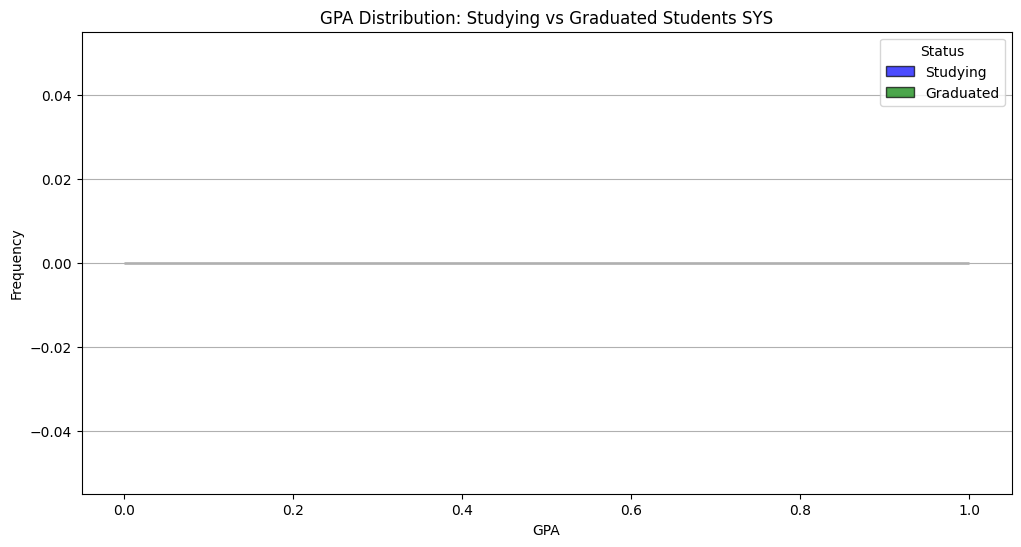

In [15]:
#Бағдарламалық қамтамасыз ету
studying_df = df[(df['CLASS'].isin([2, 3, 4])) & (df['STATUS'] == 'Studying') & (df['SPECIALITY']=='Бағдарламалық қамтамасыз ету')]

# Filter data for STATUS 'Graduated'
graduated_df = df[(df['STATUS'] == 'Graduated')& (df['SPECIALITY']=='Бағдарламалық қамтамасыз ету')]

# Plot GPA distribution for studying and graduated students
plt.figure(figsize=(12, 6))

# Plot for studying students
plt.hist(studying_df['GPA'], bins=5, alpha=0.7, label='Studying', color='blue', edgecolor='black')

# Plot for graduated students
plt.hist(graduated_df['GPA'], bins=5, alpha=0.7, label='Graduated', color='green', edgecolor='black')

plt.title('GPA Distribution: Studying vs Graduated Students SYS')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.grid(axis='y')
plt.show()

In [16]:
speciality_counts = df['SPECIALITY'].value_counts()
print(speciality_counts) # here we get that the last speciality is the first course students so that's why we have not got any value

SPECIALITY
Ақпараттық жүйелер                                     3756
Компьютерлік ғылымдар                                  2467
Математика                                              920
Статистика және деректер ғылымы                         279
Математикалық және компьютерлік модельдеу               181
Мультимедиялық ғылымдар                                 165
Есептеу техникасы және бағдарламалық қамтамасыз ету      62
Бағдарламалық қамтамасыз ету                             17
Name: count, dtype: int64


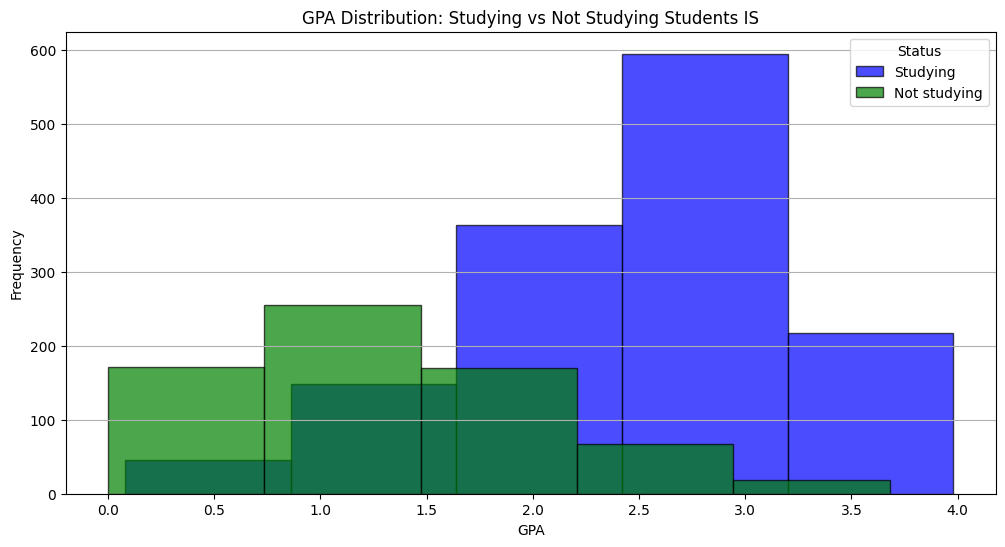

In [23]:
studying_df = df[(df['CLASS'].isin([2, 3, 4])) & (df['STATUS'] == 'Studying') & (df['SPECIALITY']=='Ақпараттық жүйелер')]

# Filter data for STATUS 'Graduated'
removed_df = df[(df['STATUS'] == 'Not studying')& (df['SPECIALITY']=='Ақпараттық жүйелер')]

# Plot GPA distribution for studying and graduated students
plt.figure(figsize=(12, 6))

# Plot for studying students
plt.hist(studying_df['GPA'], bins=5, alpha=0.7, label='Studying', color='blue', edgecolor='black')

# Plot for graduated students
plt.hist(removed_df['GPA'], bins=5, alpha=0.7, label='Not studying', color='green', edgecolor='black')

plt.title('GPA Distribution: Studying vs Not Studying Students IS')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.grid(axis='y')
plt.show()

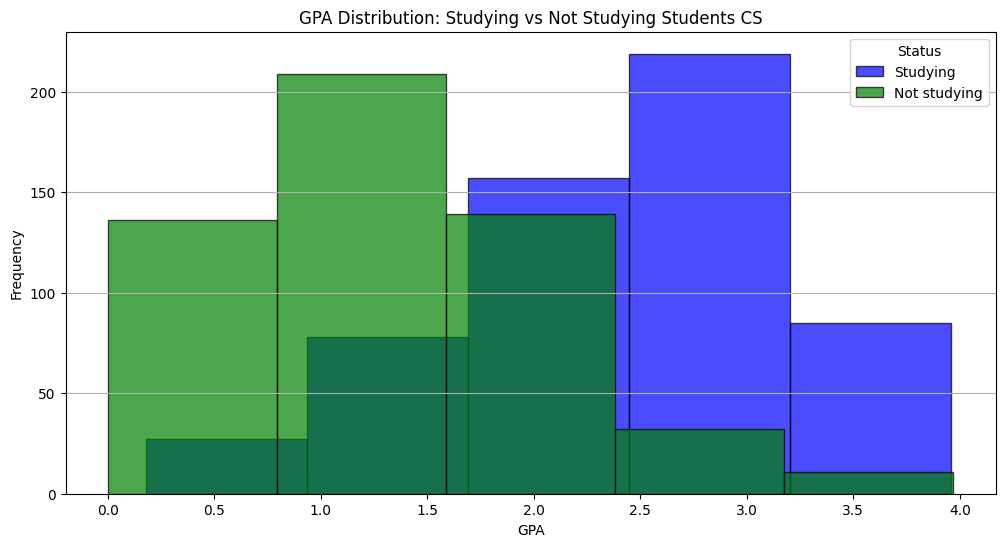

In [22]:
studying_df = df[(df['CLASS'].isin([2, 3, 4])) & (df['STATUS'] == 'Studying') & (df['SPECIALITY']=='Компьютерлік ғылымдар')]

# Filter data for STATUS 'Graduated'
removed_df = df[(df['STATUS'] == 'Not studying')& (df['SPECIALITY']=='Компьютерлік ғылымдар')]

# Plot GPA distribution for studying and graduated students
plt.figure(figsize=(12, 6))

# Plot for studying students
plt.hist(studying_df['GPA'], bins=5, alpha=0.7, label='Studying', color='blue', edgecolor='black')

# Plot for graduated students
plt.hist(removed_df['GPA'], bins=5, alpha=0.7, label='Not studying', color='green', edgecolor='black')

plt.title('GPA Distribution: Studying vs Not Studying Students CS')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.grid(axis='y')
plt.show()

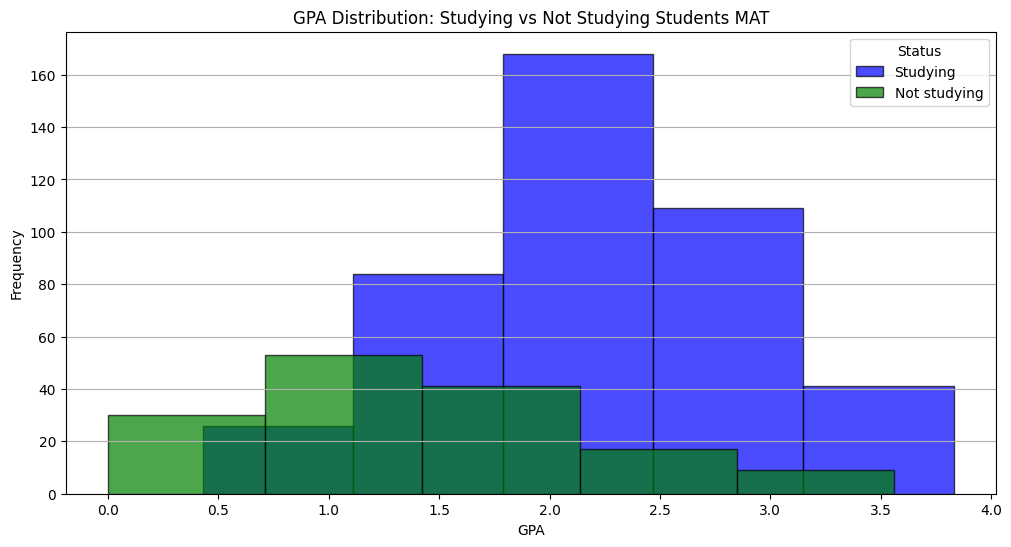

In [21]:
studying_df = df[(df['CLASS'].isin([2, 3, 4])) & (df['STATUS'] == 'Studying') & (df['SPECIALITY']=='Математика')]

# Filter data for STATUS 'Graduated'
removed_df = df[(df['STATUS'] == 'Not studying')& (df['SPECIALITY']=='Математика')]

# Plot GPA distribution for studying and graduated students
plt.figure(figsize=(12, 6))

# Plot for studying students
plt.hist(studying_df['GPA'], bins=5, alpha=0.7, label='Studying', color='blue', edgecolor='black')

# Plot for graduated students
plt.hist(removed_df['GPA'], bins=5, alpha=0.7, label='Not studying', color='green', edgecolor='black')

plt.title('GPA Distribution: Studying vs Not Studying Students MAT')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.grid(axis='y')
plt.show()

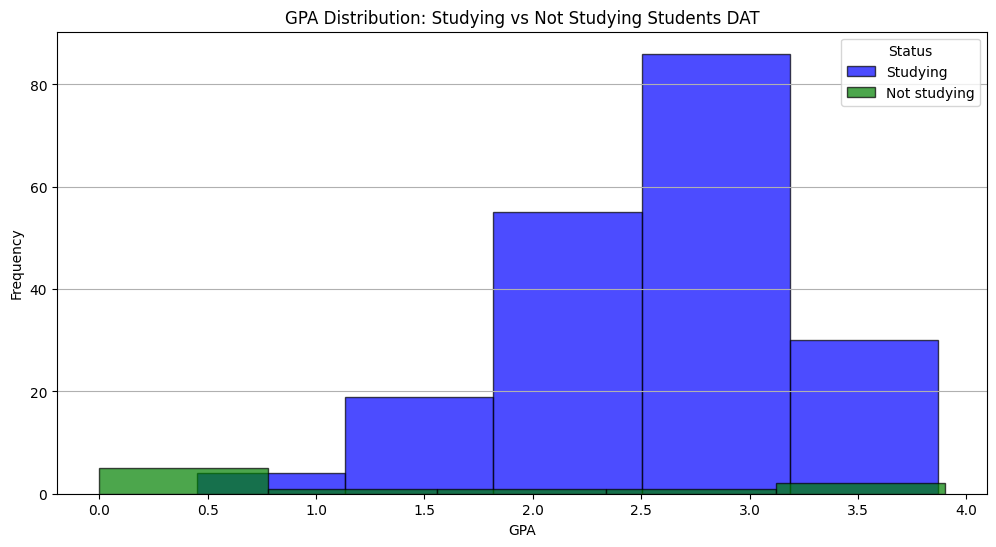

In [26]:
studying_df = df[(df['CLASS'].isin([2, 3, 4])) & (df['STATUS'] == 'Studying') & (df['SPECIALITY']=='Статистика және деректер ғылымы')]

# Filter data for STATUS 'Graduated'
removed_df = df[(df['STATUS'] == 'Not studying')& (df['SPECIALITY']=='Статистика және деректер ғылымы')]

# Plot GPA distribution for studying and graduated students
plt.figure(figsize=(12, 6))

# Plot for studying students
plt.hist(studying_df['GPA'], bins=5, alpha=0.7, label='Studying', color='blue', edgecolor='black')

# Plot for graduated students
plt.hist(removed_df['GPA'], bins=5, alpha=0.7, label='Not studying', color='green', edgecolor='black')

plt.title('GPA Distribution: Studying vs Not Studying Students DAT')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.grid(axis='y')
plt.show()

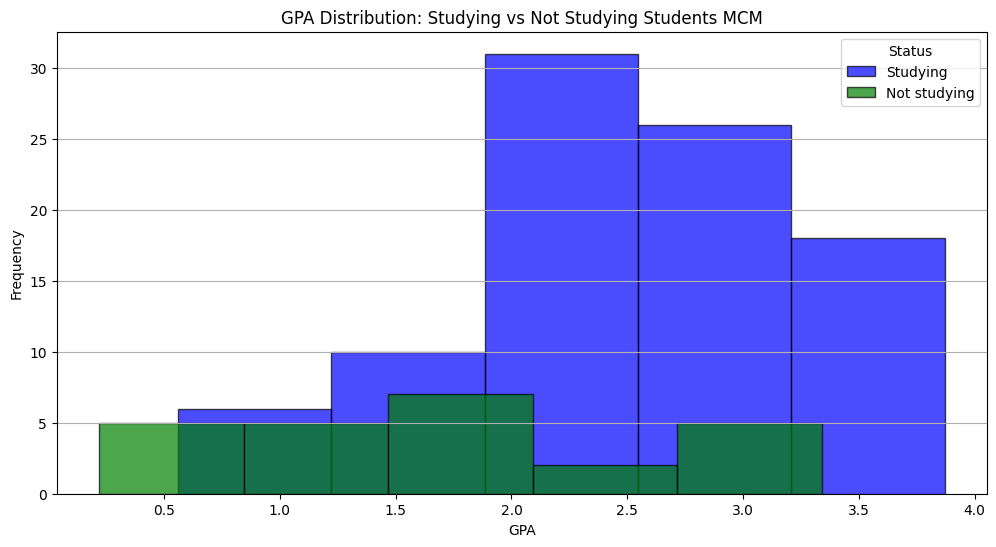

In [25]:
studying_df = df[(df['CLASS'].isin([2, 3, 4])) & (df['STATUS'] == 'Studying') & (df['SPECIALITY']=='Математикалық және компьютерлік модельдеу')]

# Filter data for STATUS 'Graduated'
removed_df = df[(df['STATUS'] == 'Not studying')& (df['SPECIALITY']=='Математикалық және компьютерлік модельдеу')]

# Plot GPA distribution for studying and graduated students
plt.figure(figsize=(12, 6))

# Plot for studying students
plt.hist(studying_df['GPA'], bins=5, alpha=0.7, label='Studying', color='blue', edgecolor='black')

# Plot for graduated students
plt.hist(removed_df['GPA'], bins=5, alpha=0.7, label='Not studying', color='green', edgecolor='black')

plt.title('GPA Distribution: Studying vs Not Studying Students MCM')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.grid(axis='y')
plt.show()

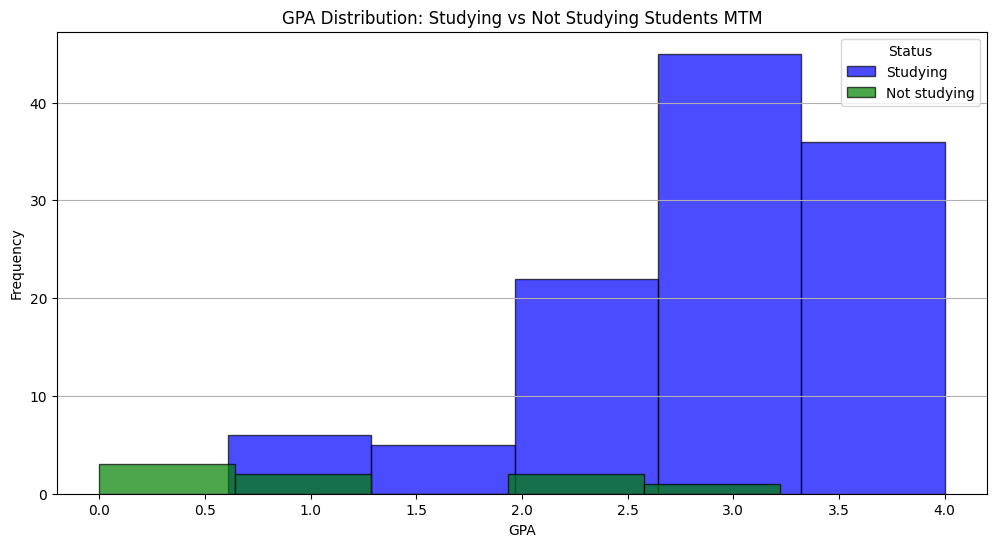

In [27]:
studying_df = df[(df['CLASS'].isin([2, 3, 4])) & (df['STATUS'] == 'Studying') & (df['SPECIALITY']=='Мультимедиялық ғылымдар')]

# Filter data for STATUS 'Graduated'
removed_df = df[(df['STATUS'] == 'Not studying')& (df['SPECIALITY']=='Мультимедиялық ғылымдар')]

# Plot GPA distribution for studying and graduated students
plt.figure(figsize=(12, 6))

# Plot for studying students
plt.hist(studying_df['GPA'], bins=5, alpha=0.7, label='Studying', color='blue', edgecolor='black')

# Plot for graduated students
plt.hist(removed_df['GPA'], bins=5, alpha=0.7, label='Not studying', color='green', edgecolor='black')

plt.title('GPA Distribution: Studying vs Not Studying Students MTM')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.grid(axis='y')
plt.show()

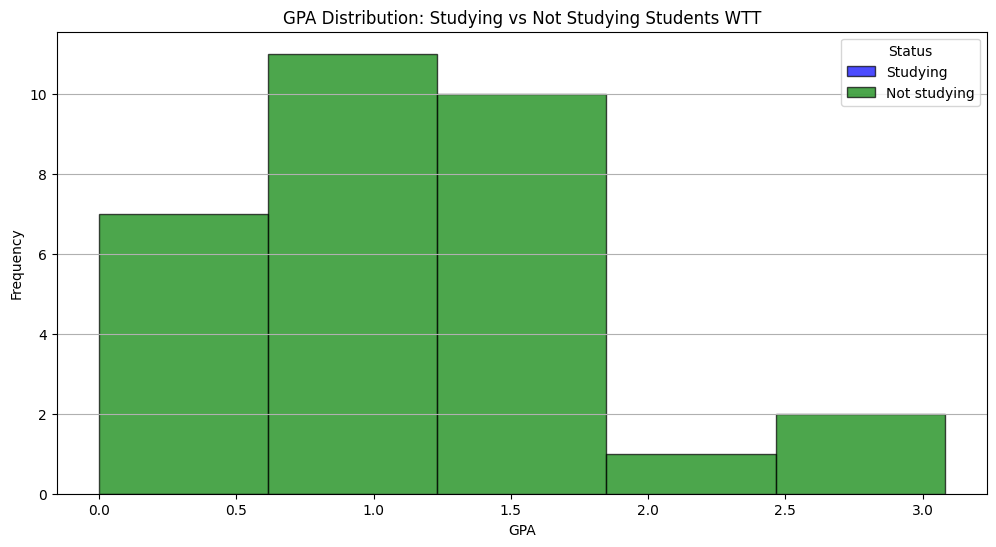

In [28]:
studying_df = df[(df['CLASS'].isin([2, 3, 4])) & (df['STATUS'] == 'Studying') & (df['SPECIALITY']=='Есептеу техникасы және бағдарламалық қамтамасыз ету')]

# Filter data for STATUS 'Graduated'
removed_df = df[(df['STATUS'] == 'Not studying')& (df['SPECIALITY']=='Есептеу техникасы және бағдарламалық қамтамасыз ету')]

# Plot GPA distribution for studying and graduated students
plt.figure(figsize=(12, 6))

# Plot for studying students
plt.hist(studying_df['GPA'], bins=5, alpha=0.7, label='Studying', color='blue', edgecolor='black')

# Plot for graduated students
plt.hist(removed_df['GPA'], bins=5, alpha=0.7, label='Not studying', color='green', edgecolor='black')

plt.title('GPA Distribution: Studying vs Not Studying Students WTT')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.grid(axis='y')
plt.show()

<ipython-input-31-c8c58e73a7bd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = df_filtered['REG_DATE'].dt.year


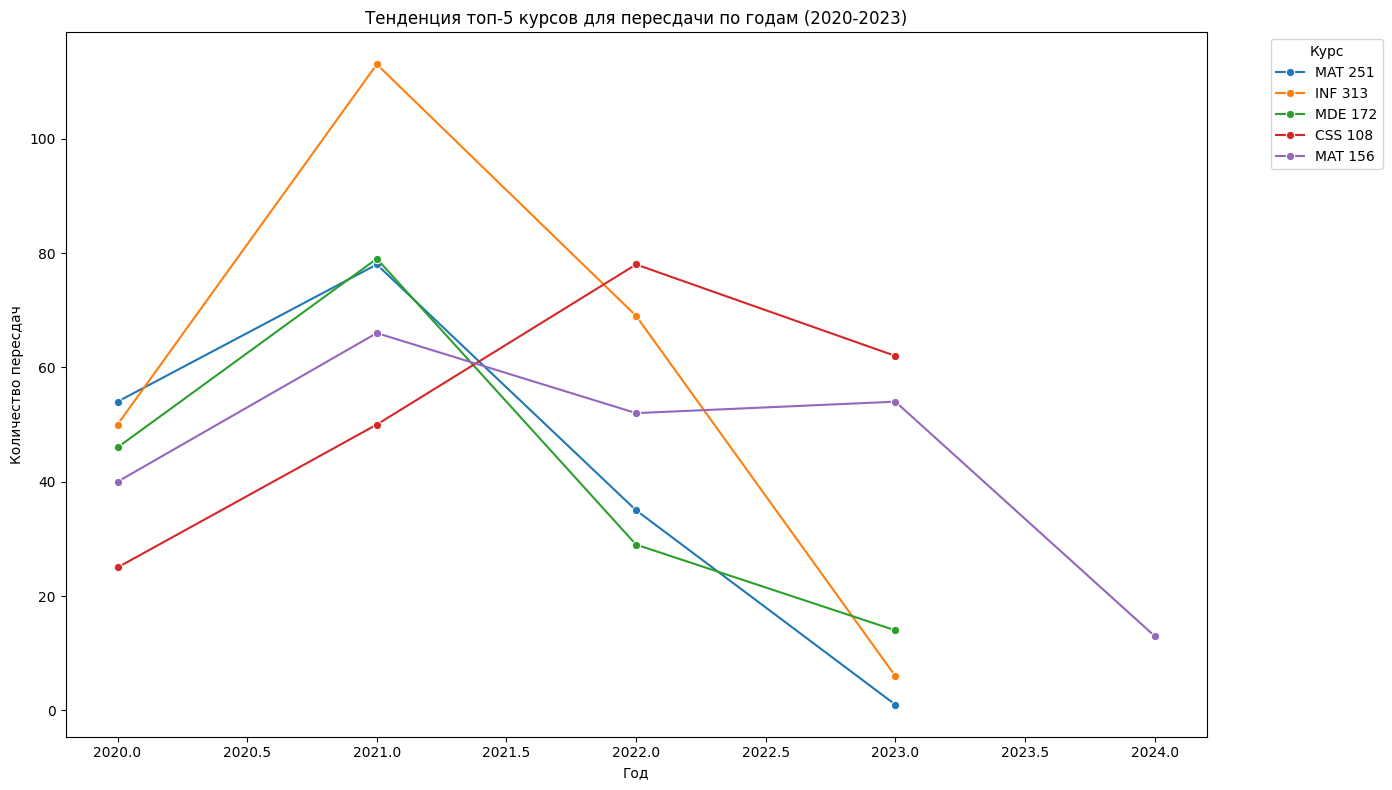

In [31]:
required_columns = ['CLASS', 'STATUS', 'SPECIALITY', 'FAILED_COURSES', 'REG_DATE']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"В данных отсутствуют следующие колонки: {', '.join(missing_columns)}")

df['REG_DATE'] = pd.to_datetime(df['REG_DATE'], errors='coerce')
df = df.dropna(subset=['REG_DATE'])

df = df[df['FAILED_COURSES'] != 'Not Failed:)']

df_filtered = df[(df['STATUS'] == 'Studying') & (df['REG_DATE'] >= '2020-01-01')]

df_filtered['Year'] = df_filtered['REG_DATE'].dt.year

retake_courses_yearly = {}
for _, row in df_filtered.iterrows():
    year = row['Year']
    courses = row['FAILED_COURSES']
    if isinstance(courses, str):
        for course in courses.split(','):
            course = course.strip()
            if year not in retake_courses_yearly:
                retake_courses_yearly[year] = {}
            retake_courses_yearly[year][course] = retake_courses_yearly[year].get(course, 0) + 1

trend_data = []
for year, courses in retake_courses_yearly.items():
    for course, count in courses.items():
        trend_data.append({'Year': year, 'Course': course, 'Count': count})

yearly_trends_df = pd.DataFrame(trend_data)

top_courses_overall = yearly_trends_df.groupby('Course')['Count'].sum().nlargest(5).index
yearly_trends_df = yearly_trends_df[yearly_trends_df['Course'].isin(top_courses_overall)]

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=yearly_trends_df,
    x='Year',
    y='Count',
    hue='Course',
    marker='o'
)

plt.title("Тенденция топ-5 курсов для пересдачи по годам (2020-2023)")
plt.xlabel("Год")
plt.ylabel("Количество пересдач")
plt.legend(title="Курс", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [33]:
def count_failed_courses(courses):
    if pd.isna(courses) or courses.strip() == "" or "not failed" in courses.lower():
        return 0
    return len(courses.split(','))

df['FAILED_COURSES_COUNT'] = df['FAILED_COURSES'].apply(count_failed_courses)

# Find the person with the biggest number of failed courses
person_with_most_failed_courses = df.loc[df['FAILED_COURSES_COUNT'].idxmax()]

print("Person with the biggest number of failed courses:")
print(person_with_most_failed_courses)


Person with the biggest number of failed courses:
Unnamed: 0.1                                                         1506
Unnamed: 0                                                           1506
№                                                                    1507
CLASS                                                                   4
PROG_CODE                                                           10103
EDU_LANG                                                               EN
SPECIALITY                                             Ақпараттық жүйелер
DEP_CODE                                                      DEP_INF_SYS
DEP_CODE_F                                                          F_ENG
EDU_LEVEL                                                               B
STATUS                                                           Studying
JOIN_MARKS                                                             92
GENDER                                                        

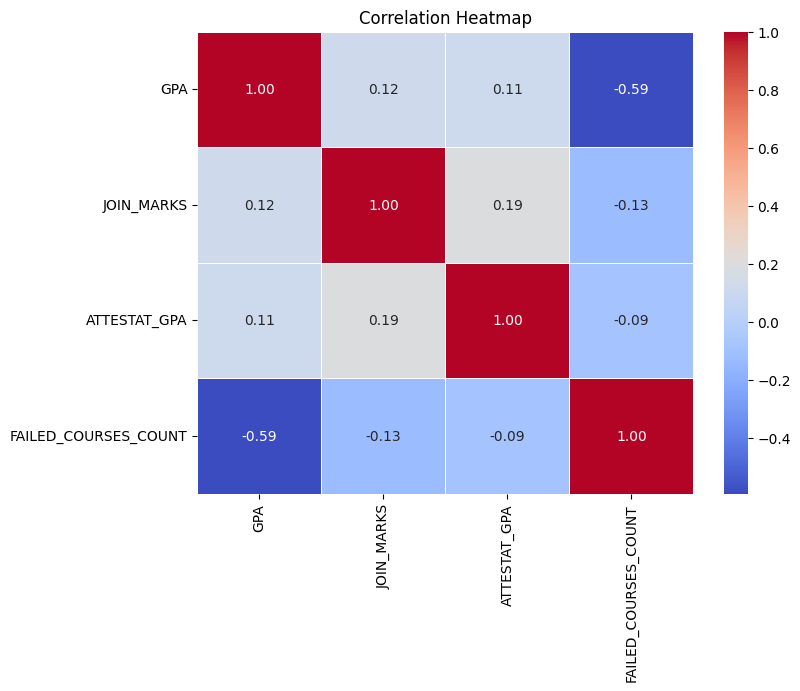

In [34]:
def count_failed_courses(courses):
    if pd.isna(courses) or courses.strip() == "" or "not failed" in courses.lower():
        return 0
    return len(courses.split(','))

df['FAILED_COURSES_COUNT'] = df['FAILED_COURSES'].apply(count_failed_courses)

correlation_matrix = df[['GPA', 'JOIN_MARKS', 'ATTESTAT_GPA', 'FAILED_COURSES_COUNT']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'INF 313'),
  Text(1, 0, 'MAT 156'),
  Text(2, 0, 'CSS 108'),
  Text(3, 0, 'MAT 251'),
  Text(4, 0, 'MDE 172'),
  Text(5, 0, 'MAT 151'),
  Text(6, 0, 'MAT 154'),
  Text(7, 0, 'INF 106'),
  Text(8, 0, 'CSS 152'),
  Text(9, 0, 'INF 202'),
  Text(10, 0, 'CSS 215'),
  Text(11, 0, 'CSS 105'),
  Text(12, 0, 'INF 232'),
  Text(13, 0, 'CSS 410'),
  Text(14, 0, 'INF 138'),
  Text(15, 0, 'MDE 151'),
  Text(16, 0, 'MDE 154'),
  Text(17, 0, 'INF 203'),
  Text(18, 0, 'MDE 133'),
  Text(19, 0, 'INF 338')])

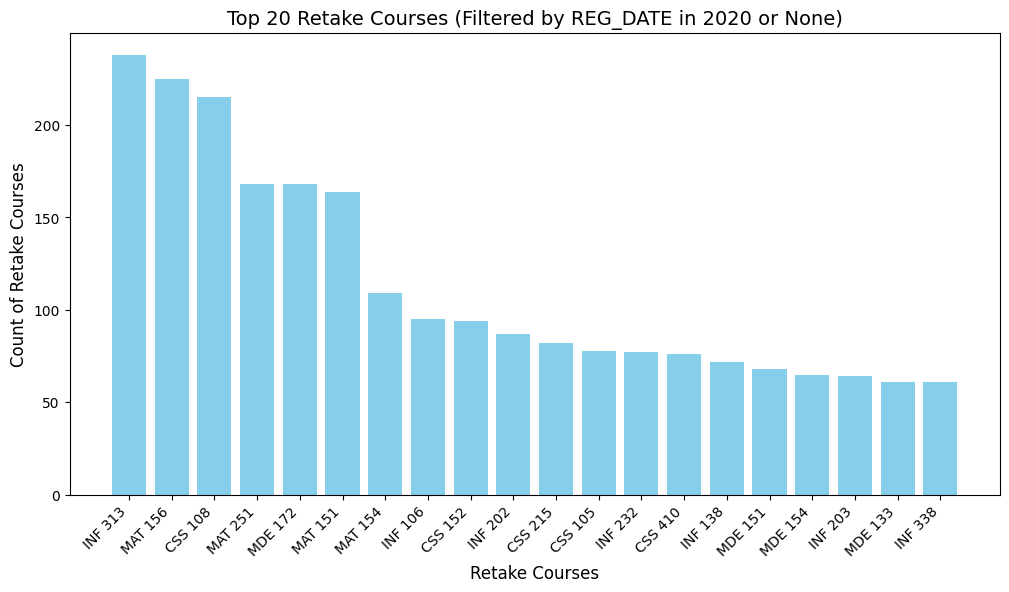

In [37]:
filtered = df[(df['REG_DATE'].dt.year == 2020) | (df['REG_DATE'].isna())]
filtered = df[df['STATUS'] == 'Studying']

retake_courses = {}
for courses in filtered['FAILED_COURSES']:
    if isinstance(courses, str) and courses != "Not Failed:)":
        for course in courses.split(','):
            course = course.strip()
            retake_courses[course] = retake_courses.get(course, 0) + 1

sorted_courses = sorted(retake_courses.items(), key=lambda x: x[1], reverse=True)[:20]
courses, counts = zip(*sorted_courses)

plt.figure(figsize=(12, 6))
plt.bar(courses, counts, color='skyblue')
plt.xlabel('Retake Courses', fontsize=12)
plt.ylabel('Count of Retake Courses', fontsize=12)
plt.title('Top 20 Retake Courses (Filtered by REG_DATE in 2020 or None)', fontsize=14)
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'MAT 156'),
  Text(1, 0, 'CSS 108'),
  Text(2, 0, 'INF 313'),
  Text(3, 0, 'MAT 151'),
  Text(4, 0, 'MAT 251'),
  Text(5, 0, 'MDE 172'),
  Text(6, 0, 'CSS 105'),
  Text(7, 0, 'INF 106'),
  Text(8, 0, 'CSS 152'),
  Text(9, 0, 'MAT 154'),
  Text(10, 0, 'INF 202'),
  Text(11, 0, 'MDE 151'),
  Text(12, 0, 'INF 231'),
  Text(13, 0, 'MDE 133'),
  Text(14, 0, 'CSS 215'),
  Text(15, 0, 'MAT 153'),
  Text(16, 0, 'MDE 190'),
  Text(17, 0, 'MDE 132'),
  Text(18, 0, 'MDE 152'),
  Text(19, 0, 'INF 232')])

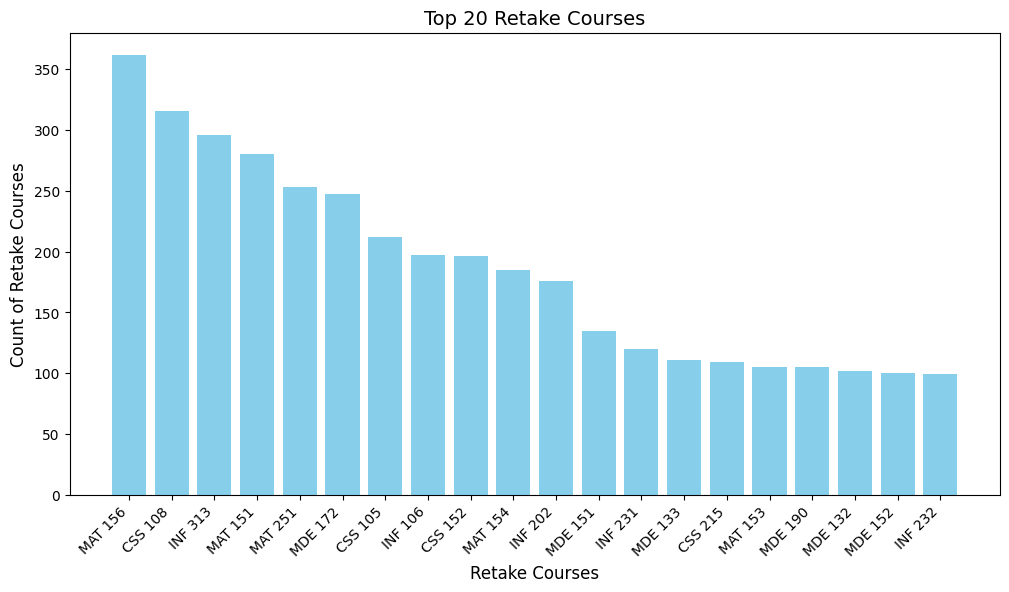

In [39]:
import matplotlib.pyplot as plt



retake_courses = {}
for courses in df['FAILED_COURSES']:
    if isinstance(courses, str) and courses != "Not Failed:)":
        for course in courses.split(','):
            course = course.strip()
            retake_courses[course] = retake_courses.get(course, 0) + 1

sorted_courses = sorted(retake_courses.items(), key=lambda x: x[1], reverse=True)[:20]
courses, counts = zip(*sorted_courses)

plt.figure(figsize=(12, 6))
plt.bar(courses, counts, color='skyblue')
plt.xlabel('Retake Courses', fontsize=12)
plt.ylabel('Count of Retake Courses', fontsize=12)
plt.title('Top 20 Retake Courses', fontsize=14)
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'MAT 156'),
  Text(1, 0, 'CSS 105'),
  Text(2, 0, 'MAT 151'),
  Text(3, 0, 'INF 106'),
  Text(4, 0, 'CSS 152'),
  Text(5, 0, 'CSS 108'),
  Text(6, 0, 'INF 202'),
  Text(7, 0, 'MAT 251'),
  Text(8, 0, 'MAT 153'),
  Text(9, 0, 'MDE 172'),
  Text(10, 0, 'MAT 154'),
  Text(11, 0, 'MDE 151'),
  Text(12, 0, 'MDE 171'),
  Text(13, 0, 'INF 231'),
  Text(14, 0, 'MDE 132'),
  Text(15, 0, 'INF 313'),
  Text(16, 0, 'MDE 190'),
  Text(17, 0, 'MDE 133'),
  Text(18, 0, 'MDE 131'),
  Text(19, 0, 'MDE 191')])

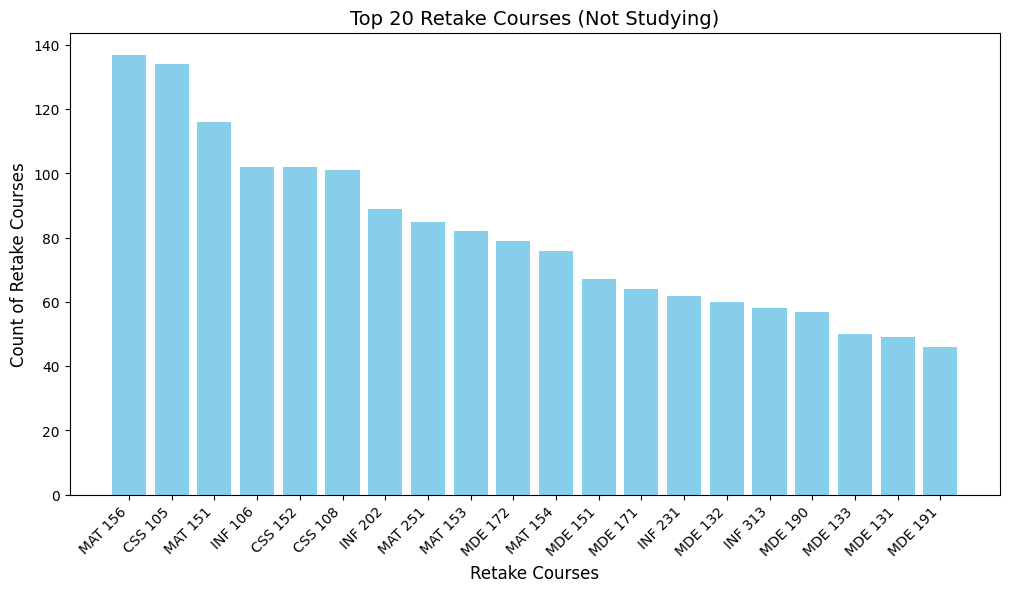

In [40]:
import matplotlib.pyplot as plt

filtered = df[df['STATUS'] == 'Not studying']

retake_courses = {}
for courses in filtered['FAILED_COURSES']:
    if isinstance(courses, str) and courses != "Not Failed:)":
        for course in courses.split(','):
            course = course.strip()
            retake_courses[course] = retake_courses.get(course, 0) + 1

sorted_courses = sorted(retake_courses.items(), key=lambda x: x[1], reverse=True)[:20]
courses, counts = zip(*sorted_courses)

plt.figure(figsize=(12, 6))
plt.bar(courses, counts, color='skyblue')
plt.xlabel('Retake Courses', fontsize=12)
plt.ylabel('Count of Retake Courses', fontsize=12)
plt.title('Top 20 Retake Courses (Not Studying)', fontsize=14)
plt.xticks(rotation=45, ha='right')

In [43]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Example: retake_courses is pre-defined with failed courses

# Function to preprocess the FAILED_COURSES column
def preprocess_failed_courses(df):
    if 'FAILED_COURSES' not in df.columns:
        raise ValueError("The 'FAILED_COURSES' column is missing from the dataset.")
    df['FAILED_COURSES'] = df['FAILED_COURSES'].fillna('').str.strip().str.upper().replace('NOT FAILED:)', '')
    return df

# Function to add binary columns for retake courses
def add_retake_courses_columns(df, retake_courses):
    for course in retake_courses:
        column_name = course.replace(' ', '_')  # Replace spaces to avoid column name issues
        df[column_name] = df['FAILED_COURSES'].apply(
            lambda x: 1 if isinstance(x, str) and course in x else 0
        )
    return df

# Function to encode categorical columns
def encode_categorical_columns(df, columns):
    label_encoders = {}
    for col in columns:
        if col not in df.columns:
            raise ValueError(f"Missing column '{col}' in the dataset.")
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    return df, label_encoders

# Example: Load the dataset
# df = pd.read_csv("data.csv")  # Replace with your actual data file

# Ensure all required columns are present
required_columns = ['JOIN_MARKS', 'GENDER', 'SPECIALITY', 'GRANT_CATEGORY', 'GPA', 'REPEATSYEAR', 'STATUS', 'FAILED_COURSES']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Missing columns in data: {', '.join(missing_columns)}")

# Preprocess the FAILED_COURSES column
df = preprocess_failed_courses(df)

# Add binary columns for retake courses
if not retake_courses:
    raise ValueError("The set of retake_courses is empty. Ensure it is populated correctly.")
df = add_retake_courses_columns(df, retake_courses)

# Encode categorical columns
categorical_columns = ['GENDER', 'SPECIALITY', 'GRANT_CATEGORY']
df, label_encoders = encode_categorical_columns(df, categorical_columns)

# Select only required columns and retake course columns
retake_course_features = [course.replace(' ', '_') for course in retake_courses]
all_features = ['JOIN_MARKS', 'GENDER', 'SPECIALITY', 'GRANT_CATEGORY', 'GPA', 'REPEATSYEAR'] + retake_course_features
df = df[all_features + ['STATUS']]

# Prepare data for modeling
train_df = df[df['STATUS'].isin(['Graduated', 'Not studying'])]
test_df = df[df['STATUS'] == 'Studying']

if train_df.empty:
    raise ValueError("No data available for training. Check 'Graduated' and 'Not studying' statuses.")
if test_df.empty:
    raise ValueError("No data available for testing. Check 'Studying' status.")

# Target variable
y_train = train_df['STATUS'].apply(lambda x: 1 if x == 'Graduated' else 0)

# Features
features = all_features  # Use dynamically generated features list

X_train = train_df[features]
X_test = test_df[features]

# Train the Random Forest model
status_clf = RandomForestClassifier(random_state=42)
status_clf.fit(X_train, y_train)

# Evaluate the model on training data
y_pred_train = status_clf.predict(X_train)
print("Accuracy (Train Data):", accuracy_score(y_train, y_pred_train))
print("Classification Report (Train Data):\n", classification_report(y_train, y_pred_train))

# Predict for 'Studying' students
test_df['Predicted_Status'] = status_clf.predict(X_test)
test_df['Predicted_Status'] = test_df['Predicted_Status'].apply(lambda x: 'Graduated' if x == 1 else 'Not Studying')

# Display predictions
print("Predictions for students with 'Studying' status:")
print(test_df[['JOIN_MARKS', 'GENDER', 'SPECIALITY', 'GRANT_CATEGORY', 'GPA', 'REPEATSYEAR', 'Predicted_Status']])

# Predict for 'Studying' students
test_df['Predicted_Status'] = status_clf.predict(X_test)
test_df['Predicted_Status'] = test_df['Predicted_Status'].apply(lambda x: 'Graduated' if x == 1 else 'Not Studying')

# Calculate the ratio of 'Graduated' predictions
graduated_count = (test_df['Predicted_Status'] == 'Graduated').sum()
total_studying = len(test_df)
graduation_ratio = graduated_count / total_studying if total_studying > 0 else 0

# Display predictions and the graduation ratio
print("Predictions for students with 'Studying' status:")
print(test_df[['JOIN_MARKS', 'GENDER', 'SPECIALITY', 'GRANT_CATEGORY', 'GPA', 'REPEATSYEAR', 'Predicted_Status']])
print(f"\nGraduation Ratio: {graduated_count}/{total_studying} = {graduation_ratio:.2f}")

<ipython-input-43-3e822603e4dd>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = df['FAILED_COURSES'].apply(
<ipython-input-43-3e822603e4dd>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = df['FAILED_COURSES'].apply(
<ipython-input-43-3e822603e4dd>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fr

Accuracy (Train Data): 1.0
Classification Report (Train Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       364

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364

Predictions for students with 'Studying' status:
      JOIN_MARKS  GENDER  SPECIALITY  GRANT_CATEGORY   GPA  REPEATSYEAR  \
1484          96       1           0               0  1.58            1   
1485         109       1           0               0  2.77            1   
1486         101       1           0               0  0.83            1   
1487         106       1           0               0  1.75            1   
1488          62       1           0               2  1.28            1   
...          ...     ...         ...             ...   ...          ...   
7045          78       1           2               0  1.30            0   
7052          

<ipython-input-43-3e822603e4dd>:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df['Predicted_Status'] = status_clf.predict(X_test)
<ipython-input-43-3e822603e4dd>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted_Status'] = status_clf.predict(X_test)
<ipython-input-43-3e822603e4dd>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [44]:
data_test = test_df[['JOIN_MARKS', 'GENDER', 'SPECIALITY', 'GPA', 'REPEATSYEAR', 'Predicted_Status']]

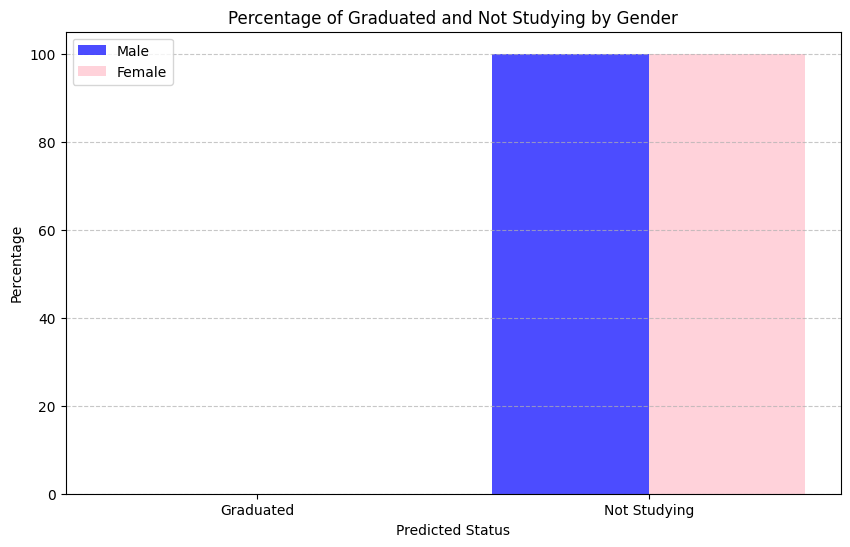

In [45]:
male_data = data_test[data_test['GENDER'] == 1]
female_data = data_test[data_test['GENDER'] == 0]

male_graduated_percent = len(male_data[male_data['Predicted_Status'] == 'Graduated']) / len(male_data) * 100
male_not_studying_percent = len(male_data[male_data['Predicted_Status'] == 'Not Studying']) / len(male_data) * 100

female_graduated_percent = len(female_data[female_data['Predicted_Status'] == 'Graduated']) / len(female_data) * 100
female_not_studying_percent = len(female_data[female_data['Predicted_Status'] == 'Not Studying']) / len(female_data) * 100

# Visualization
categories = ['Graduated', 'Not Studying']
male_percents = [male_graduated_percent, male_not_studying_percent]
female_percents = [female_graduated_percent, female_not_studying_percent]

x = range(len(categories))

plt.figure(figsize=(10, 6))
plt.bar(x, male_percents, width=0.4, label='Male', align='center', color='blue', alpha=0.7)
plt.bar([p + 0.4 for p in x], female_percents, width=0.4, label='Female', align='center', color='pink', alpha=0.7)

plt.xlabel('Predicted Status')
plt.ylabel('Percentage')
plt.title('Percentage of Graduated and Not Studying by Gender')
plt.xticks([p + 0.2 for p in x], categories)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-46-422318918d0e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['JOIN_MARKS_GROUP'] = data_test['JOIN_MARKS'].apply(categorize_join_marks)


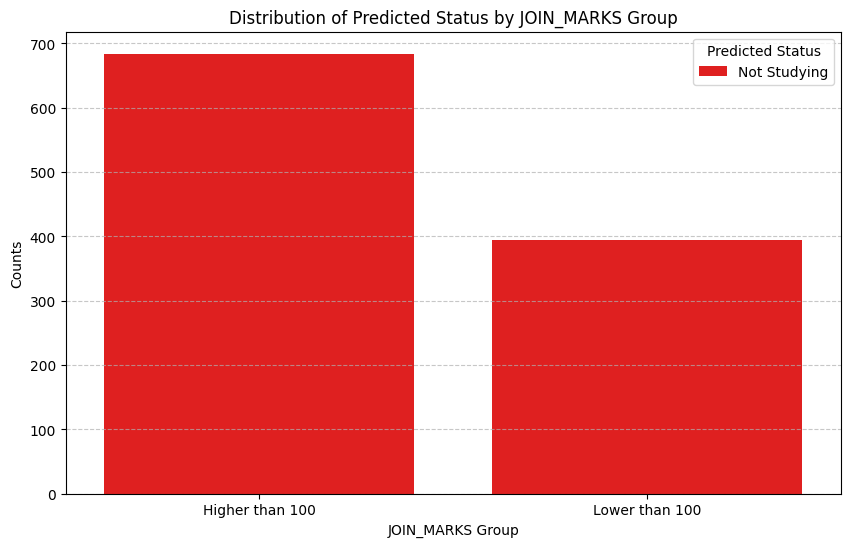

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to categorize JOIN_MARKS
def categorize_join_marks(marks):
    return 'Higher than 100' if marks > 100 else 'Lower than 100'

data_test['JOIN_MARKS_GROUP'] = data_test['JOIN_MARKS'].apply(categorize_join_marks)

# Count Predicted_Status for each group
status_counts = data_test.groupby(['JOIN_MARKS_GROUP', 'Predicted_Status']).size().reset_index(name='Counts')

# Define custom color palette
custom_palette = {'Graduated': 'green', 'Not Studying': 'red'}

# Visualization with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(x='JOIN_MARKS_GROUP', y='Counts', hue='Predicted_Status', data=status_counts, palette=custom_palette)
plt.title('Distribution of Predicted Status by JOIN_MARKS Group')
plt.xlabel('JOIN_MARKS Group')
plt.ylabel('Counts')
plt.legend(title='Predicted Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-48-ca3376165ec5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['SPECIALITY'] = data_test['SPECIALITY'].replace({


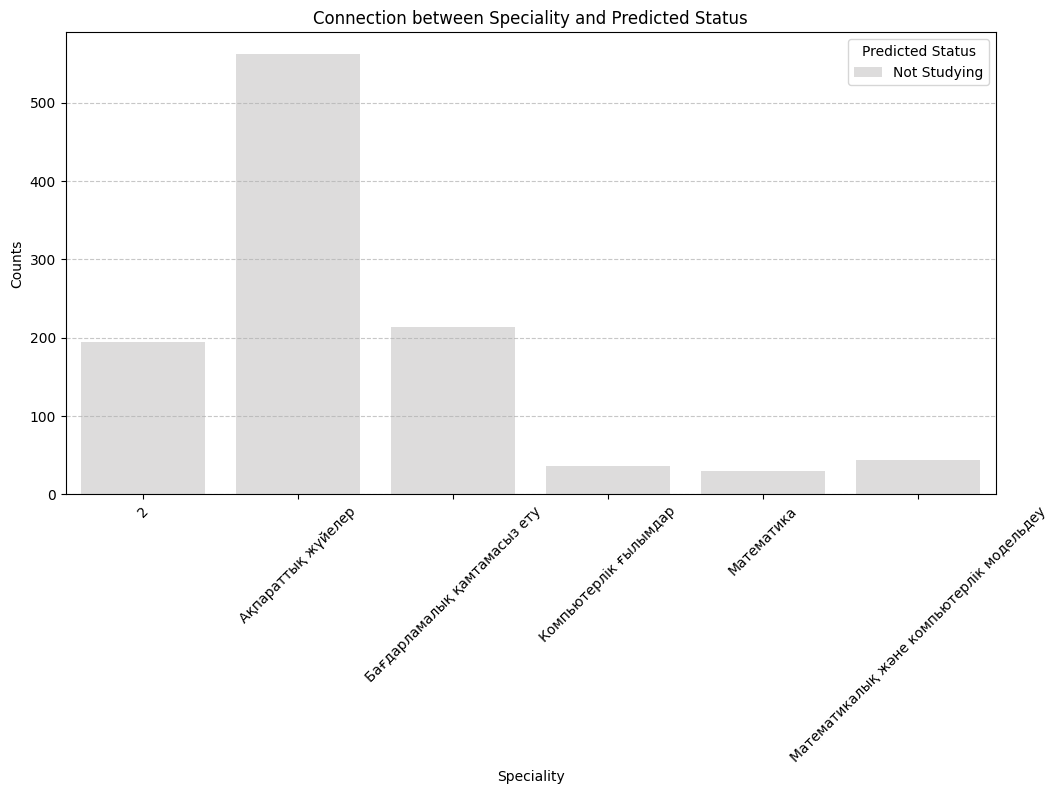

In [48]:
data_test['SPECIALITY'] = data_test['SPECIALITY'].replace({
    0: 'Ақпараттық жүйелер',
    1: 'Бағдарламалық қамтамасыз ету',
    3: 'Компьютерлік ғылымдар',
    4: 'Математика',
    5: 'Математикалық және компьютерлік модельдеу',
    6: 'Мультимедиялық ғылымдар',
    7: 'Статистика және деректер ғылымы'
})

speciality_status_counts = data_test.groupby(['SPECIALITY', 'Predicted_Status']).size().reset_index(name='Counts')
plt.figure(figsize=(12, 6))
sns.barplot(x='SPECIALITY', y='Counts', hue='Predicted_Status', data=speciality_status_counts, palette='coolwarm')
plt.title('Connection between Speciality and Predicted Status')
plt.xlabel('Speciality')
plt.ylabel('Counts')
plt.legend(title='Predicted Status')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()